In [1]:
#!pip install pysentimiento==0.7.2

In [1]:
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")


2023-12-07 12:43:37.472080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
analyzer.predict("Qué olor a mandarina")

AnalyzerOutput(output=NEG, probas={NEG: 0.740, NEU: 0.174, POS: 0.087})

In [3]:
#Hate Speech (violencia de genero)

hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

In [4]:
hate_speech_analyzer.predict('bonita violencia violencia mareemo perdiz violencia feminista ust forma verbal president violencia seca')

AnalyzerOutput(output=[], probas={hateful: 0.382, targeted: 0.047, aggressive: 0.129})

In [5]:
analyzer.predict('bonita violencia violencia mareemo perdiz violencia feminista ust forma verbal president violencia seca')

AnalyzerOutput(output=NEG, probas={NEG: 0.906, NEU: 0.083, POS: 0.011})

In [6]:
import pandas as pd
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_violencia_genero_procesado.csv')

In [7]:
df['comment_stem'][0]

'gracia sufri denuncia falsa traumatico pasado'

In [8]:
def asignar_valor(elemento):
    if isinstance(elemento, str):
        resultado = analyzer.predict(elemento)
        if resultado.output == 'NEG':
            return -1
        elif resultado.output == 'NEU':
            return 0
        elif resultado.output == 'POS':
            return 1
        else:
            print(f"Output de sentimiento desconocido: {resultado.output}")
            return None  # Manejar otros casos si es necesario

# Aplicar la función a la columna 'comment_stem' y crear una nueva columna 'valor_asignado'
df['sentiment'] = df['comment_stem'].apply(lambda x: asignar_valor(x))

# Mostrar el DataFrame con la nueva columna


In [9]:
df.head()

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,a7it63FFDYQ,UCCxYKcRLEbe6EusqL5OQBfg,Gracias!! Yo sufri una denuncia falsa!! :( Es ...,gracia sufri denuncia falsa traumatico pasado,[0. 0. 0. ... 0. 0. 0.],-1.0
1,1,a7it63FFDYQ,UCSG2kGc5Eo4uaGVGpZDPfvw,que aire mas fresco el escuchar a una mujer ha...,air fresco escuchar mujer hablar comun gracia ...,[0. 0. 0. ... 0. 0. 0.],1.0
2,2,a7it63FFDYQ,UCmQhCCXFJv-UoJRrodVx_SA,"La violencia no tiene género, viva España viva...",violencia nero viva espa viva extrema necesidad,[0. 0. 0. ... 0. 0. 0.],-1.0
3,3,a7it63FFDYQ,UCTYWAaYoawlQZidmzUeQDQw,"Gracias por decir las cosas tal cual son, falt...",gracia decir cosa faltan persona expliquen cos...,[0. 0. 0. ... 0. 0. 0.],-1.0
4,4,a7it63FFDYQ,UCKSkZ-UBv7IDny45Er0JEPQ,"Hola ,quisiera de tu consejo, mi hermana vive ...",hola quisiera consejo hermana vive situaci ate...,[0. 0. 0. ... 0. 0. 0.],-1.0


In [10]:
df['sentiment'].value_counts()

 0.0    4418
-1.0    3322
 1.0    1205
Name: sentiment, dtype: int64

In [11]:
df[df['sentiment']==-1]

,Unnamed: 0,video_id,author,comment,comment_stem,vectores_tfidf,sentiment
0,0,a7it63FFDYQ,UCCxYKcRLEbe6EusqL5OQBfg,Gracias!! Yo sufri una denuncia falsa!! :( Es ...,gracia sufri denuncia falsa traumatico pasado,[0. 0. 0. ... 0. 0. 0.],-1.0
2,2,a7it63FFDYQ,UCmQhCCXFJv-UoJRrodVx_SA,"La violencia no tiene género, viva España viva...",violencia nero viva espa viva extrema necesidad,[0. 0. 0. ... 0. 0. 0.],-1.0
3,3,a7it63FFDYQ,UCTYWAaYoawlQZidmzUeQDQw,"Gracias por decir las cosas tal cual son, falt...",gracia decir cosa faltan persona expliquen cos...,[0. 0. 0. ... 0. 0. 0.],-1.0
4,4,a7it63FFDYQ,UCKSkZ-UBv7IDny45Er0JEPQ,"Hola ,quisiera de tu consejo, mi hermana vive ...",hola quisiera consejo hermana vive situaci ate...,[0. 0. 0. ... 0. 0. 0.],-1.0
10,10,a7it63FFDYQ,UCQ-c5nA_h5mnnelNWeRwQJQ,BONITA LA VIOLENCIA ES VIOLENCIA Y NO MAREEMOS...,bonita violencia violencia mareemo perdiz viol...,[0. 0. 0. ... 0. 0. 0.],-1.0
...,...,...,...,...,...,...,...
9317,9317,0XM9GRpRPhE,UCTfPKjDVVvsx73BqSE1tpUA,"Por supuesto q este joven tiene toda la razon,...",supuesto joven toda razon medio prensa estan a...,[0. 0. 0. ... 0. 0. 0.],-1.0
9320,9320,0XM9GRpRPhE,UCAX2LebL1tVSsCWdKIoz1Jw,Los pseudoperiodistas en Gaza informan de lo q...,pseudoperiodista gaza informan dicen informen,[0. 0. 0. ... 0. 0. 0.],-1.0
9329,9329,uD-Keydp0FE,UCTPyZGkO1o8g7Ag0uHlMvfw,Que asco me dan los tíos que a todo le dicen c...,asco dicen cari verdad darl saludo toda mano a...,[0. 0. 0. ... 0. 0. 0.],-1.0
9330,9330,uD-Keydp0FE,UCfLpHXGAs7QOEKiaXjxepHQ,este pais es un desastre y no hay mas.,pai desastr,[0. 0. 0. ... 0. 0. 0.],-1.0


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
def show_wordcloud(df, column_name):
    all_words = df[column_name].tolist()
    all_words_str = ' '.join([str(x) for x in all_words if str(x).lower()]) 

    # Define la fuente TrueType que quieres usar (asegúrate de que sea compatible)
    font_path = 'arial.ttf'
    
    # Resto de tu código para procesar el texto y generar la WordCloud...
    wordcloud = WordCloud(
        width=2000,
        height=1000,
        random_state=1,
        background_color='black',
        colormap='viridis',
        #font_path=font_path
    ).generate(all_words_str)
    
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

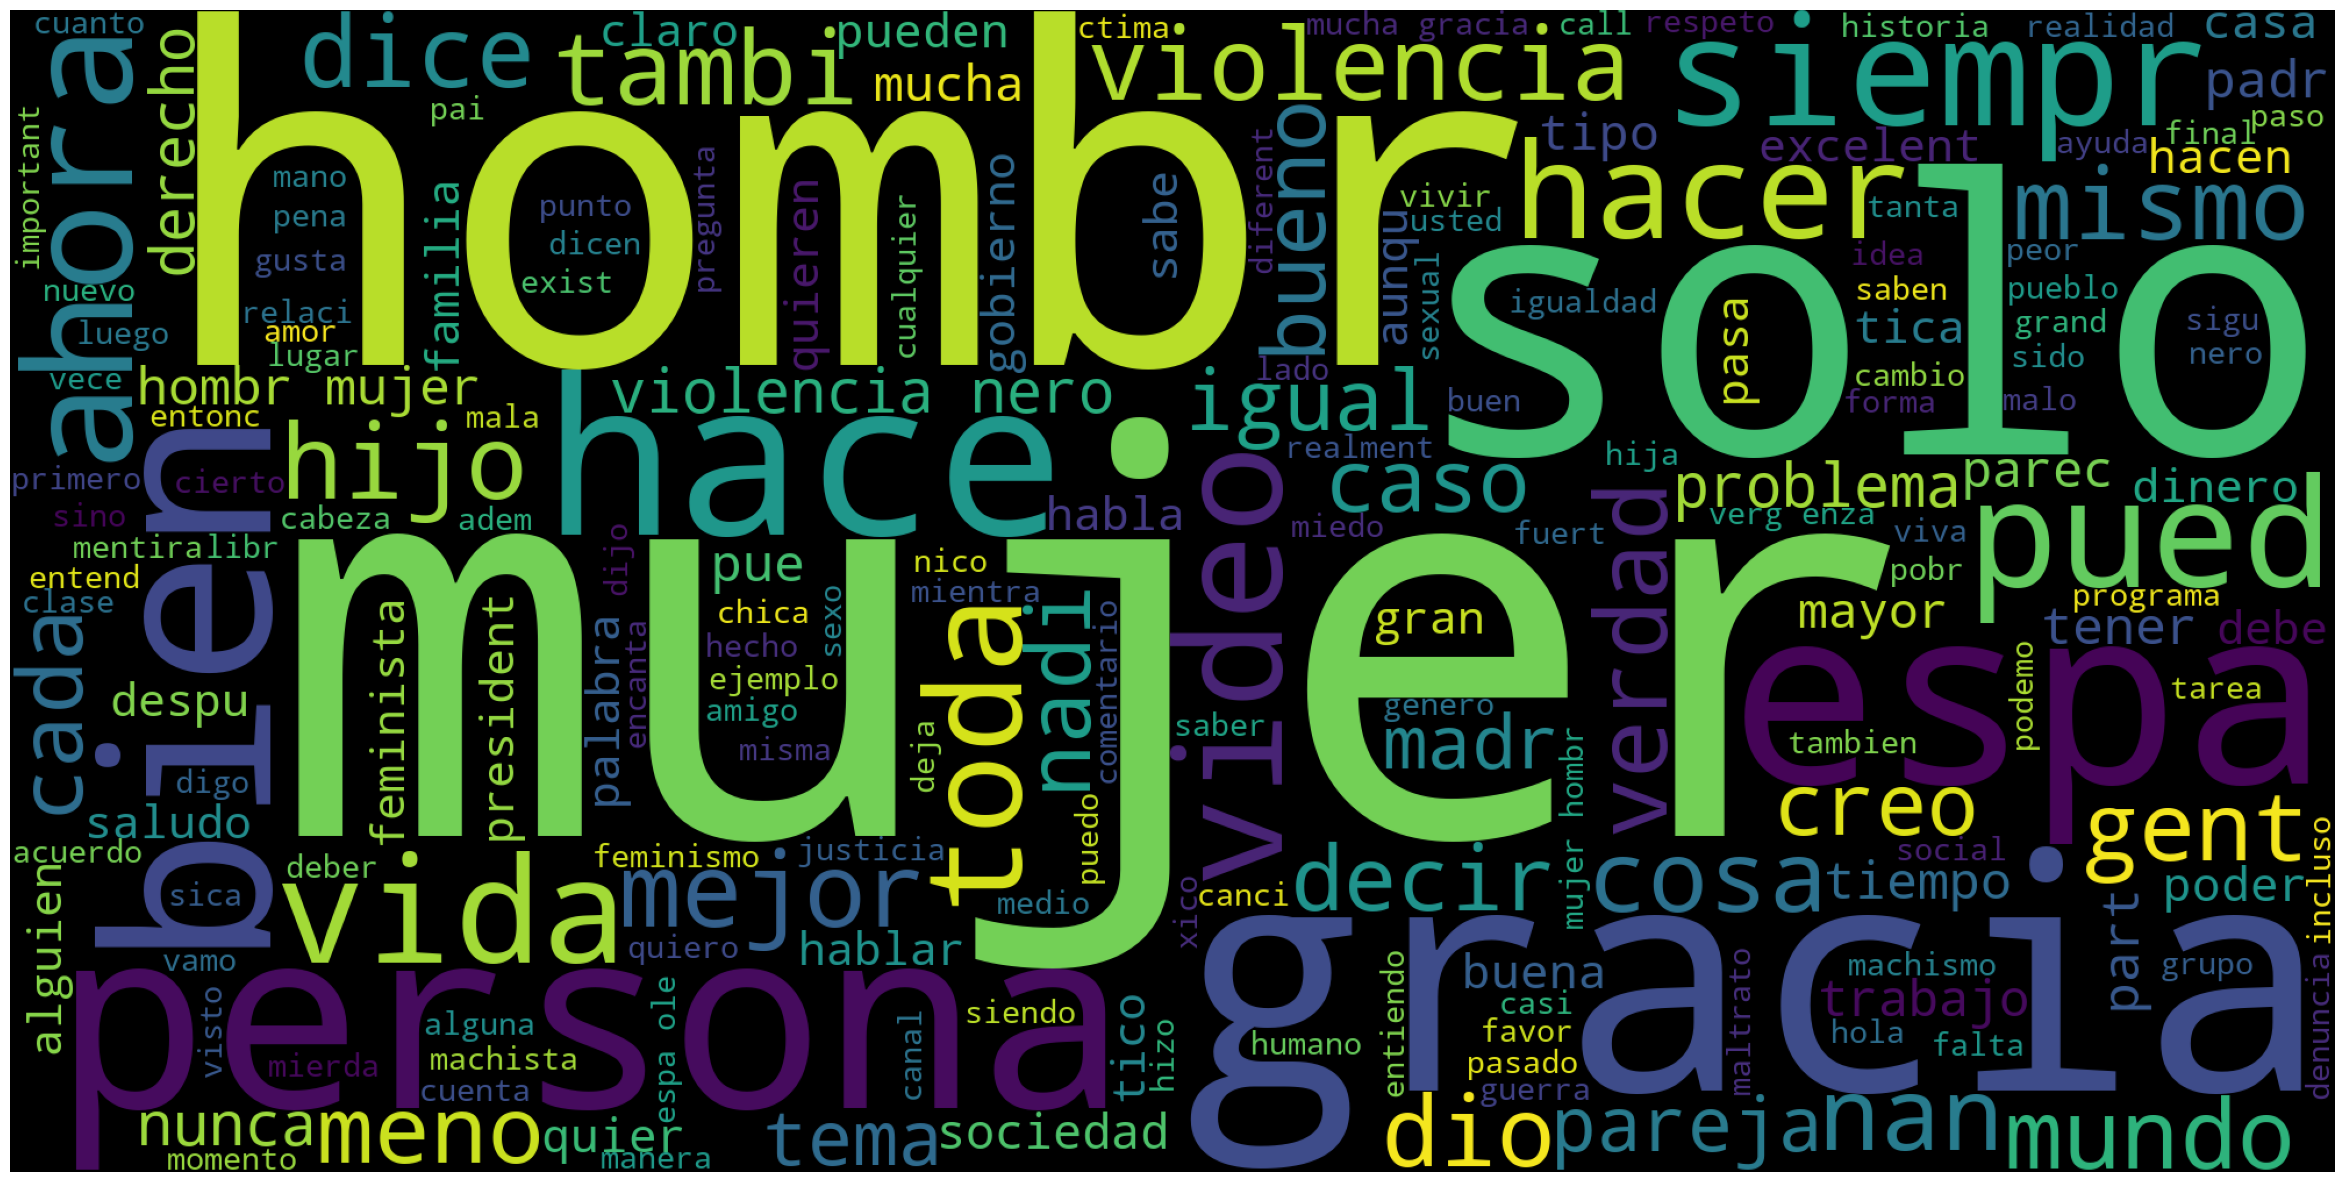

In [14]:
show_wordcloud(df,'comment_stem')

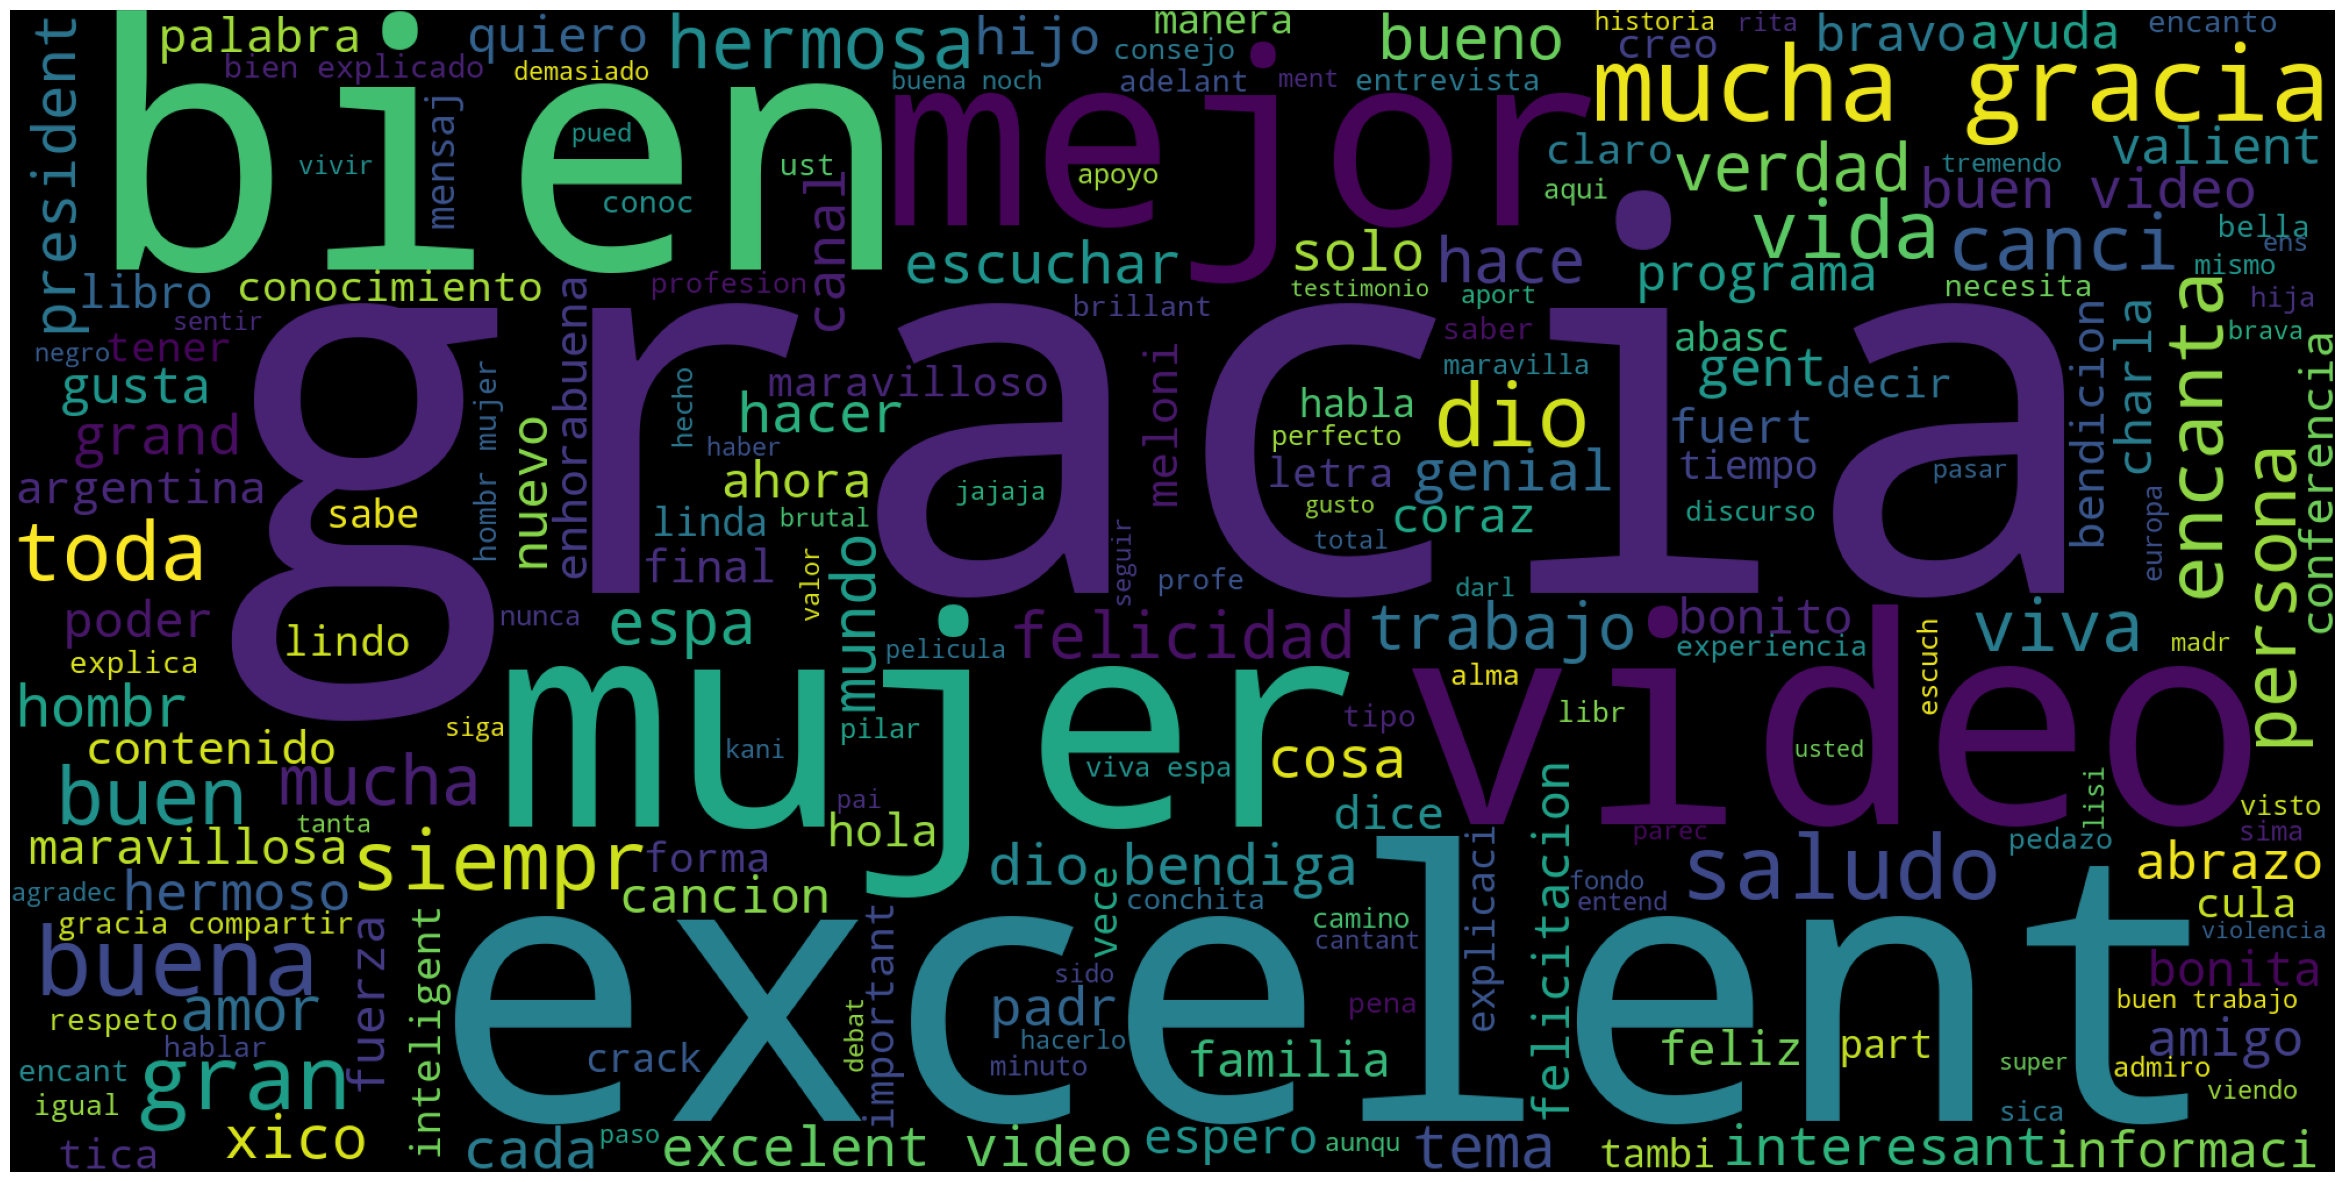

In [15]:
show_wordcloud(df[df['sentiment'] == 1], 'comment_stem')

In [16]:
df.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_violencia_genero_sentimiento.csv')

In [17]:
# Filtrar las filas donde 'sentiment' es igual a -1
df_neg = df[df['sentiment'] == -1]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neg = df_neg[columnas_deseadas].copy()

df_neg.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,a7it63FFDYQ,UCCxYKcRLEbe6EusqL5OQBfg,Gracias!! Yo sufri una denuncia falsa!! :( Es ...,[0. 0. 0. ... 0. 0. 0.],gracia sufri denuncia falsa traumatico pasado,-1.0
2,a7it63FFDYQ,UCmQhCCXFJv-UoJRrodVx_SA,"La violencia no tiene género, viva España viva...",[0. 0. 0. ... 0. 0. 0.],violencia nero viva espa viva extrema necesidad,-1.0
3,a7it63FFDYQ,UCTYWAaYoawlQZidmzUeQDQw,"Gracias por decir las cosas tal cual son, falt...",[0. 0. 0. ... 0. 0. 0.],gracia decir cosa faltan persona expliquen cos...,-1.0
4,a7it63FFDYQ,UCKSkZ-UBv7IDny45Er0JEPQ,"Hola ,quisiera de tu consejo, mi hermana vive ...",[0. 0. 0. ... 0. 0. 0.],hola quisiera consejo hermana vive situaci ate...,-1.0
10,a7it63FFDYQ,UCQ-c5nA_h5mnnelNWeRwQJQ,BONITA LA VIOLENCIA ES VIOLENCIA Y NO MAREEMOS...,[0. 0. 0. ... 0. 0. 0.],bonita violencia violencia mareemo perdiz viol...,-1.0


In [18]:
df_neg.shape

(3322, 6)

In [19]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_violencia_genero_negativo.csv')

In [20]:
import pandas as pd

In [21]:
df_neg = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_violencia_genero_negativo.csv')

In [22]:
df_neg.shape

(3322, 7)

In [7]:
def hateful(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'hateful' está presente en las probabilidades
        if 'hateful' in resultado.probas:
            return resultado.probas['hateful']  # Devolver el valor de 'hateful'
        else:
            print(f"No se encontró 'hateful' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [24]:
df_neg['c_hateful'] = df_neg['comment_stem'].apply(lambda x: hateful(x))

In [25]:
df_neg['comment_stem'][2472]

'gracia tortura hacer hacer'

In [26]:
hate_speech_analyzer.predict('polic migraci dejan meter saben corren peligro')

AnalyzerOutput(output=[], probas={hateful: 0.397, targeted: 0.005, aggressive: 0.148})

In [8]:
def targeted(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'targeted' está presente en las probabilidades
        if 'targeted' in resultado.probas:
            return resultado.probas['targeted']  # Devolver el valor de 'targeted'
        else:
            print(f"No se encontró 'targeted' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [28]:
df_neg['targeted'] = df_neg['comment_stem'].apply(lambda x: targeted(x))

In [9]:
def aggresive(elemento):
    if isinstance(elemento, str):
        resultado = hate_speech_analyzer.predict(elemento)
        # Verificar si 'aggressive' está presente en las probabilidades
        if 'aggressive' in resultado.probas:
            return resultado.probas['aggressive']  # Devolver el valor de 'aggressive'
        else:
            print(f"No se encontró 'aggressive' en las probabilidades: {resultado.probas}")
            return None
    else:
        print(f"Tipo de entrada no válido: {type(elemento)}")
        return None

In [30]:
df_neg['aggresive'] = df_neg['comment_stem'].apply(lambda x: aggresive(x))

In [31]:
df_neg.head()

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment,c_hateful,targeted,aggresive
0,0,a7it63FFDYQ,UCCxYKcRLEbe6EusqL5OQBfg,Gracias!! Yo sufri una denuncia falsa!! :( Es ...,[0. 0. 0. ... 0. 0. 0.],gracia sufri denuncia falsa traumatico pasado,-1.0,0.015386,0.015949,0.013035
1,2,a7it63FFDYQ,UCmQhCCXFJv-UoJRrodVx_SA,"La violencia no tiene género, viva España viva...",[0. 0. 0. ... 0. 0. 0.],violencia nero viva espa viva extrema necesidad,-1.0,0.031034,0.013025,0.022954
2,3,a7it63FFDYQ,UCTYWAaYoawlQZidmzUeQDQw,"Gracias por decir las cosas tal cual son, falt...",[0. 0. 0. ... 0. 0. 0.],gracia decir cosa faltan persona expliquen cos...,-1.0,0.028815,0.006495,0.016642
3,4,a7it63FFDYQ,UCKSkZ-UBv7IDny45Er0JEPQ,"Hola ,quisiera de tu consejo, mi hermana vive ...",[0. 0. 0. ... 0. 0. 0.],hola quisiera consejo hermana vive situaci ate...,-1.0,0.114790,0.006909,0.039621
4,10,a7it63FFDYQ,UCQ-c5nA_h5mnnelNWeRwQJQ,BONITA LA VIOLENCIA ES VIOLENCIA Y NO MAREEMOS...,[0. 0. 0. ... 0. 0. 0.],bonita violencia violencia mareemo perdiz viol...,-1.0,0.382134,0.047021,0.128899


In [32]:
df_neg.aggresive

0       0.013035
1       0.022954
2       0.016642
3       0.039621
4       0.128899
          ...   
3317    0.022640
3318    0.019362
3319    0.026241
3320    0.030605
3321    0.047718
Name: aggresive, Length: 3322, dtype: float64

In [33]:
import matplotlib.pyplot as plt

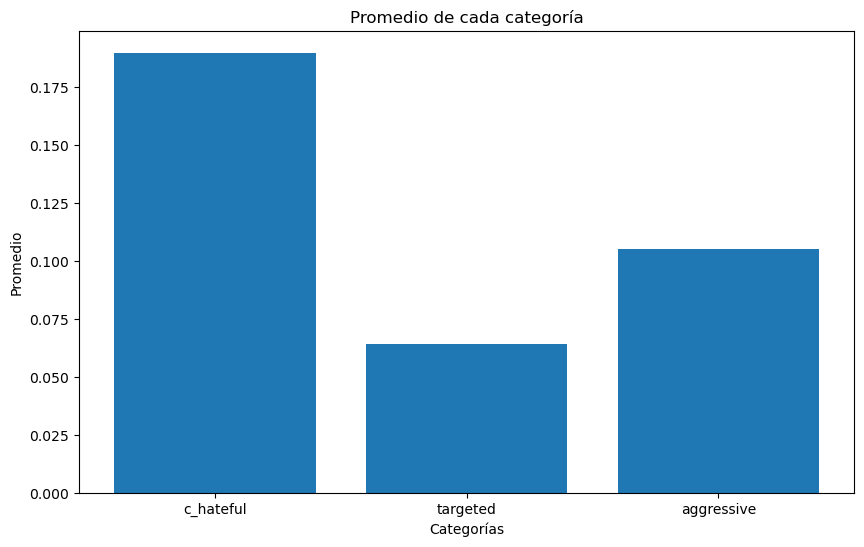

In [34]:
c_hateful = df_neg['c_hateful']
targeted = df_neg['targeted']
aggresive = df_neg['aggresive']

plt.figure(figsize=(10, 6))

plt.bar(['c_hateful', 'targeted', 'aggressive'], [c_hateful.mean(), targeted.mean(), aggresive.mean()])
plt.xlabel('Categorías')
plt.ylabel('Promedio')
plt.title('Promedio de cada categoría')

plt.show()



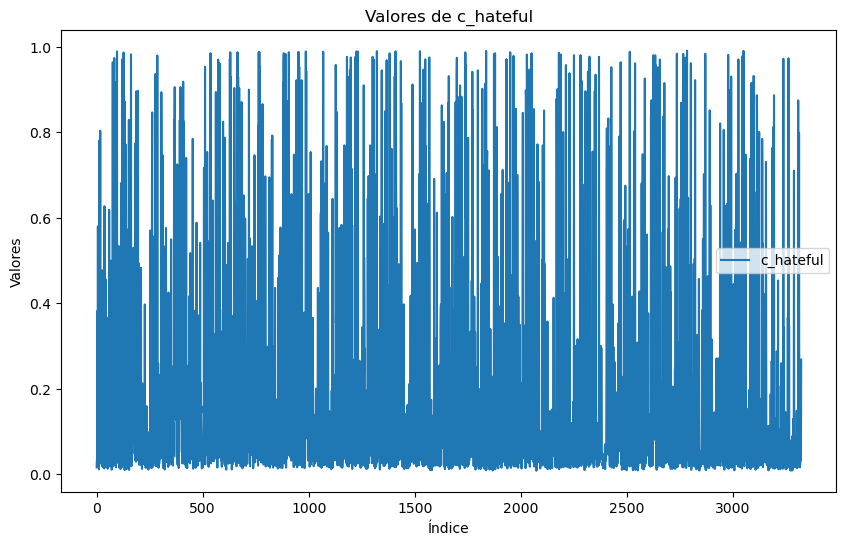

In [35]:
plt.figure(figsize=(10, 6))

plt.plot(df_neg['c_hateful'], label='c_hateful')
# plt.plot(df_neg['targeted'], label='targeted')
# plt.plot(df_neg['aggresive'], label='aggresive')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Valores de c_hateful')
plt.legend()

plt.show()

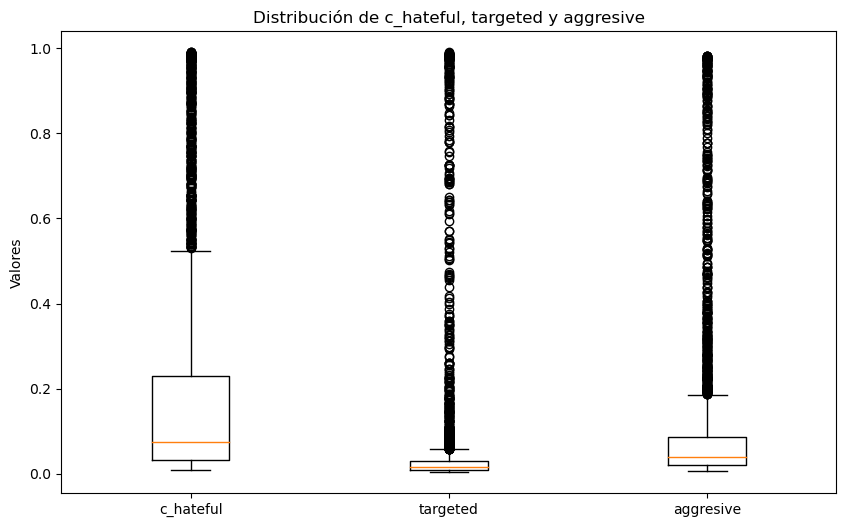

In [36]:
plt.figure(figsize=(10, 6))

plt.boxplot([c_hateful, targeted, aggresive], labels=['c_hateful', 'targeted', 'aggresive'])
plt.ylabel('Valores')
plt.title('Distribución de c_hateful, targeted y aggresive')

plt.show()

In [37]:
df_neg.to_csv('/Users/usuario/Downloads/irunela/csv/comentarios_negativos_violencia_genero_ filtrados.csv')

Filtrar los neutros

In [10]:
df = pd.read_csv('/Users/usuario/Downloads/irunela/csv/comentarios_violencia_genero_sentimiento.csv')

In [11]:
# Filtrar las filas donde 'sentiment' es igual a 0 =neutro
df_neutro = df[df['sentiment'] == 0]

# Seleccionar las columnas específicas que quieres conservar en el nuevo dataset
columnas_deseadas = ['video_id', 'author', 'comment', 'vectores_tfidf', 'comment_stem', 'sentiment']
df_neutro = df_neutro[columnas_deseadas].copy()

df_neutro.head()

,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
6,a7it63FFDYQ,UCdca8vWQNEfwNyNjAJTMctg,Ademas del porno que tantas vidas de hombres h...,[0. 0. 0. ... 0. 0. 0.],adema porno tanta vida hombr salvado surgimien...,0.0
7,a7it63FFDYQ,UC2wpIsMIq7DJxmaF91dJFbw,Perdonad quiero compartir algo que me ocurrió ...,[0. 0. 0. ... 0. 0. 0.],perdonad quiero compartir ocurri personalment ...,0.0
9,a7it63FFDYQ,UCTzl4G6p1-CBEz6TWq2HiFA,Otra idea.. autopsia a todo hombre muerto en ...,[0. 0. 0. ... 0. 0. 0.],idea autopsia hombr muerto mbito familiar caus...,0.0
11,a7it63FFDYQ,UCpLcYf746qFvtIZQim--oqw,"Me parece un vídeo muy refrescante, la verdad....",[0. 0. 0. ... 0. 0. 0.],parec refrescant verdad hora gent empiec pensa...,0.0
12,a7it63FFDYQ,UCzbxcSqDcTw3YXHxTwTMETQ,Leo comentarios y todo es razonamiento motivad...,[0. 0. 0. ... 0. 0. 0.],comentario razonamiento motivado sesgo confirm...,0.0


In [12]:
df_neutro.to_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_violencia_genero_neutro.csv')

In [13]:
df_neutro = pd.read_csv('/Users/usuario/Downloads/irunela/csv/csv_neutro/comentarios_violencia_genero_neutro.csv')
df_neutro

,Unnamed: 0,video_id,author,comment,vectores_tfidf,comment_stem,sentiment
0,6,a7it63FFDYQ,UCdca8vWQNEfwNyNjAJTMctg,Ademas del porno que tantas vidas de hombres h...,[0. 0. 0. ... 0. 0. 0.],adema porno tanta vida hombr salvado surgimien...,0.0
1,7,a7it63FFDYQ,UC2wpIsMIq7DJxmaF91dJFbw,Perdonad quiero compartir algo que me ocurrió ...,[0. 0. 0. ... 0. 0. 0.],perdonad quiero compartir ocurri personalment ...,0.0
2,9,a7it63FFDYQ,UCTzl4G6p1-CBEz6TWq2HiFA,Otra idea.. autopsia a todo hombre muerto en ...,[0. 0. 0. ... 0. 0. 0.],idea autopsia hombr muerto mbito familiar caus...,0.0
3,11,a7it63FFDYQ,UCpLcYf746qFvtIZQim--oqw,"Me parece un vídeo muy refrescante, la verdad....",[0. 0. 0. ... 0. 0. 0.],parec refrescant verdad hora gent empiec pensa...,0.0
4,12,a7it63FFDYQ,UCzbxcSqDcTw3YXHxTwTMETQ,Leo comentarios y todo es razonamiento motivad...,[0. 0. 0. ... 0. 0. 0.],comentario razonamiento motivado sesgo confirm...,0.0
...,...,...,...,...,...,...,...
4413,9338,uD-Keydp0FE,UCqlbMOnnZfHeAnCQqoGwBCA,Al verte a ti me he vuelto lesbiana,[0. 0. 0. ... 0. 0. 0.],vert vuelto lesbiana,0.0
4414,9339,uD-Keydp0FE,UCB932hwvs8aysJgdzKcqh7g,"y en el ejército el pelo tambien es distinto ,...",[0. 0. 0. ... 0. 0. 0.],rcito pelo tambien distinto prueba fisica,0.0
4415,9341,uD-Keydp0FE,UCJhpCqCpGmAYRrIXKd1tfkA,😂😂😂😂 no puedes ser más fantástico Roma,[0. 0. 0. ... 0. 0. 0.],pued fant stico roma,0.0
4416,9344,uD-Keydp0FE,UCkW0dNtwju7nTyNQ7nJLTDA,Lol lo volvió hacer xD este youtuber,[0. 0. 0. ... 0. 0. 0.],volvi hacer youtub,0.0


In [14]:
df_neutro['hateful'] = df_neutro['comment_stem'].apply(lambda x: hateful(x))

In [15]:
df_neutro['targeted'] = df_neutro['comment_stem'].apply(lambda x: targeted(x))

In [16]:
df_neutro['aggresive'] = df_neutro['comment_stem'].apply(lambda x: aggresive(x))

In [17]:
df_neutro.columns

Index(['Unnamed: 0', 'video_id', 'author', 'comment', 'vectores_tfidf',
       'comment_stem', 'sentiment', 'hateful', 'targeted', 'aggresive'],
      dtype='object')

In [18]:
#defino los valores de mas de 0.5 en hateful 
hateful_mayor_05 = df_neutro[df_neutro['hateful'] > 0.5]

In [19]:
len(hateful_mayor_05)

185

In [22]:
# Concatenar los DataFrames df_neutro y hateful_mayor_05
df_hate_violencia_genero = pd.concat([df_neutro, hateful_mayor_05], ignore_index=True)

In [23]:
df_hate_violencia_genero = df_hate_violencia_genero.drop([ 'Unnamed: 0'], axis=1)

In [24]:
df_hate_violencia_genero.to_csv('/Users/usuario/Downloads/irunela/csv/csv_hate/hate_violencia_genero.csv')

In [25]:
df_hate_violencia_genero.shape

(4603, 9)